In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/chest-xray-pneumonia


In [ ]:
import os

dir = "/kaggle/input/chest-xray-pneumonia/chest_xray"

train_df = os.path.join(dir, "train")
test_df = os.path.join(dir, "test")
val_df = os.path.join(dir, "val")

In [ ]:
img_size = 224

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow_from_directory(
    train_df,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='binary'
)

val = val_datagen.flow_from_directory(
    val_df,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
history = model.fit(train,
                    epochs=10,
                    validation_data=val)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.7303 - loss: 0.5633

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 108s 628ms/step - accuracy: 0.7306 - loss: 0.5627 - val_accuracy: 0.8125 - val_loss: 0.3814
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 77s 472ms/step - accuracy: 0.8565 - loss: 0.3156 - val_accuracy: 0.7500 - val_loss: 0.4176
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 72s 444ms/step - accuracy: 0.8780 - loss: 0.2697 - val_accuracy: 0.7500 - val_loss: 0.5006
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 71s 437ms/step - accuracy: 0.8964 - loss: 0.2427 - val_accuracy: 0.7500 - val_loss: 0.4885
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 421ms/step - accuracy: 0.9064 - loss: 0.2187 - val_accuracy: 0.8125 - val_loss: 0.5080
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 426ms/step - accuracy: 0.8991 - loss: 0.2379 - val_accuracy: 0.8125 - val_loss: 0.5166
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 428ms/step - accuracy: 0.9256 - loss: 0.1855 - val_accuracy: 0.7500 - val_loss: 0.5681
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 430ms/step - accuracy: 0.9183 - loss: 0.1941 - va

In [ ]:
test = val_datagen.flow_from_directory(
    test_df,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [ ]:
loss, acc = model.evaluate(test)
print("Loss:", loss)
print("Accuracy:", acc)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 370ms/step - accuracy: 0.8813 - loss: 0.3259
Loss: 0.33009791374206543
Accuracy: 0.8814102411270142


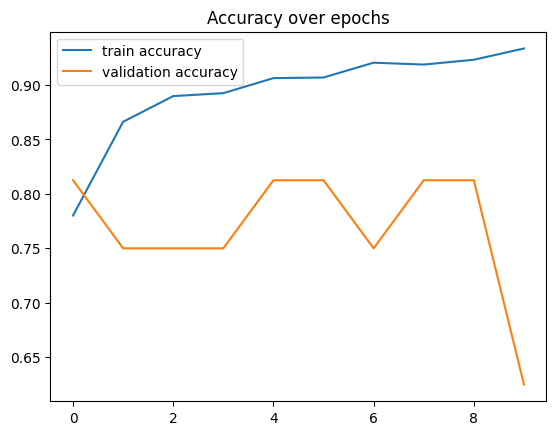

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.title("Accuracy over epochs")
plt.show()

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = True

for layer in base_model.layers[:-10]:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050,852 (15.45 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
history = model.fit(train,
                    validation_data = val,
                    epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - accuracy: 0.7228 - loss: 0.5906

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 727ms/step - accuracy: 0.7229 - loss: 0.5905 - val_accuracy: 0.5000 - val_loss: 0.7921
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 864ms/step - accuracy: 0.7460 - loss: 0.5706 - val_accuracy: 0.5000 - val_loss: 0.8632
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 619ms/step - accuracy: 0.7300 - loss: 0.5877 - val_accuracy: 0.5000 - val_loss: 0.7999
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 622ms/step - accuracy: 0.7495 - loss: 0.5666 - val_accuracy: 0.5000 - val_loss: 0.9054
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 612ms/step - accuracy: 0.7388 - loss: 0.5796 - val_accuracy: 0.5000 - val_loss: 1.0127


In [ ]:
val.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
np.unique(val.classes, return_counts=True)

(array([0, 1], dtype=int32), array([8, 8]))

In [ ]:
fine_tune_epochs = 5
history_fine = model.fit(train,
                         validation_data=val,
                         epochs=fine_tune_epochs)

Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 146s 762ms/step - accuracy: 0.7273 - loss: 0.6090 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 124s 714ms/step - accuracy: 0.7391 - loss: 0.5756 - val_accuracy: 0.5000 - val_loss: 0.7333
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 154s 787ms/step - accuracy: 0.7452 - loss: 0.5680 - val_accuracy: 0.5000 - val_loss: 0.7759
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 123s 754ms/step - accuracy: 0.7267 - loss: 0.5889 - val_accuracy: 0.5000 - val_loss: 0.8221
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 126s 776ms/step - accuracy: 0.7413 - loss: 0.5711 - val_accuracy: 0.5000 - val_loss: 0.8234


In [ ]:
loss, acc = model.evaluate(test)
print("Loss:", loss)
print("Accuracy:", acc)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 262ms/step - accuracy: 0.6332 - loss: 0.7879
Loss: 0.8016456961631775
Accuracy: 0.625


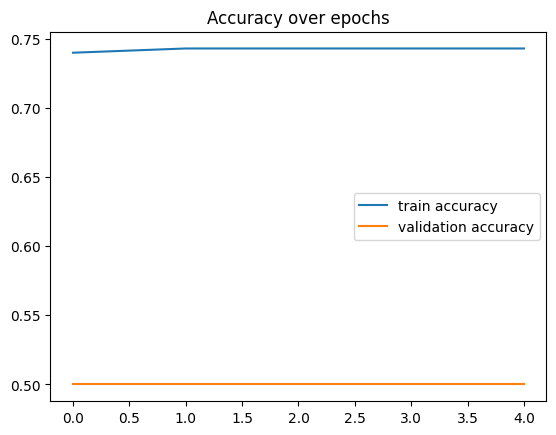

In [ ]:
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.title("Accuracy over epochs")
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

pred_probs = model.predict(test)
pred_labels = (pred_probs > 0.5).astype("int32").flatten()
true_labels = test.classes

20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 571ms/step


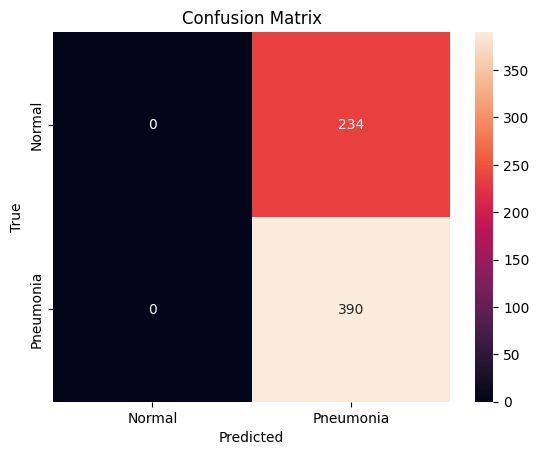

In [ ]:
cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(true_labels, pred_labels, target_names=["Normal", "Pneumonia"]))

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00       234
   Pneumonia       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
model.save("chest_xray_model.keras")

In [ ]:
from google.colab import files

files.download("chest_xray_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>